## Task 51 - Unsupervised Learning

This dataset is from the US Arrests Kaggle challenge. A description of the data is given as: "This data set contains statistics, in arrests per 100,000 residents, for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas."

Follow these steps:

- Use the dataset "UsArrests.csv" included in this folder to generate a similar in-depth PCA report of the data. Explore as much as you can, motivate the pre-processing steps you take, and interpret the outcomes of any analyses.
- You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. Try and see if you can find anything common within each cluster that has been found.
- Push all the work that you have generated for this project to GitHub.
<br/>
<br/>


____

### Compulsory Task I

___

### Import, Clean, and Prepare Data

Import any modules that might be required.

In [561]:
# pandas
import pandas as pd

#numpy
import numpy as np

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#scipy
from scipy.cluster.hierarchy import dendrogram, linkage

# sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

Load and clean the UsArrests.csv file into the notebook.

In [562]:
# Import data
df = pd.read_csv("UsArrests.csv")

# Preview data shape
df.shape

(50, 5)

In [563]:
# Preview the data
df.head(10)

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600
5,Colorado,7.900,204,78,38.700
6,Connecticut,3.300,110,77,11.100
7,Delaware,5.900,238,72,15.800
8,Florida,15.400,335,80,31.900
9,Georgia,17.400,211,60,25.800


In [564]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])

#Insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

C:\Users\akoleva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


,missing,mean,std,min,max
City,0,NaN,NaN,NaN,NaN
Murder,0,7.788,4.356,0.800,17.400
Assault,0,170.760,83.338,45.000,337.000
UrbanPop,0,65.540,14.475,32.000,91.000
Rape,0,21.232,9.366,7.300,46.000


In [565]:
# Examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


> Summary:
> - The data appears to be in good condition and does not need to be cleaned.
> - There are no missing values and the data types are as correct as needed.
> - No imputation or removal is required - we can proceed with the data for analysis and learning. <br/>
<br/>

______________

### PCA Report

______

Use the dataset to generate an in-depth PCA report. Explore, motivate the pre-processing steps, and interpret the outcomes of any analyses.

### Explore Data

> Visualise the distribution of observations for each feature using a histogram.

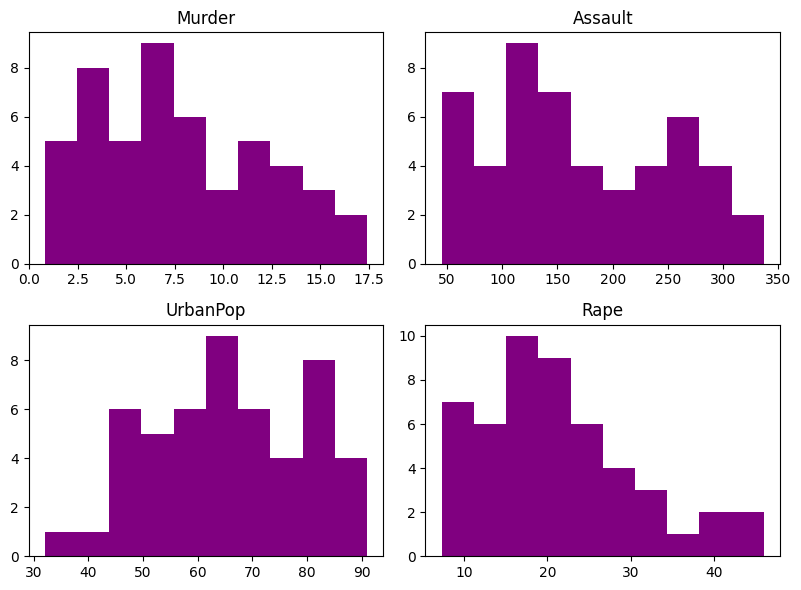

In [566]:
# Plot histograms
histograms = df.hist(color='purple', label=True, grid=False, figsize=(8, 6))
plt.tight_layout()

### Correlation Analysis

> Create a plot of the data features to show positive and negative correlations between different columns. Duplicate correlations are masked. <br/>
> In the heat map, we observe a strong positive correlation between assault and murder. There is also a strong negative correlation between murder and urban population.

Text(0.5, 1.0, 'Variable Correlation Heat Map')

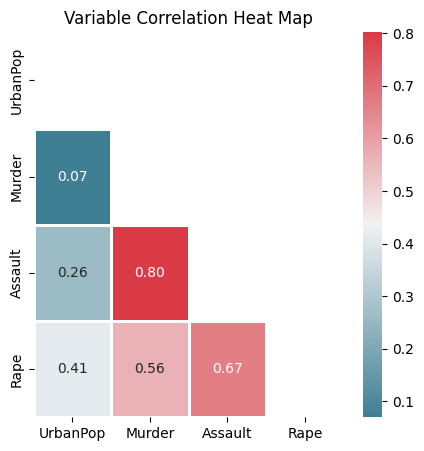

In [618]:
# Get numeric data only to measure correlation
data = df[['UrbanPop','Murder','Assault','Rape']].copy()

# Get correlations
corrs = data.corr()

# Get column names
labels = corrs.columns

# Get row names
states = df['City'] # Alternative: states = data.index

# Create heatmap plot and select figure size
fig, ax = plt.subplots(figsize=(5, 5))

# Select seaborn colour palette for heatmaps
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Mask mirrored side of heat map
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate annotated heat map of correlation strength
ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", linewidth=2, mask=dropSelf)

# Add title
plt.title("Variable Correlation Heat Map")

### Principal Components Analysis (PCA)

> The PCA method uses vectors to find variables ("principal components") based on the maximum variance of observations. <br/>
> Since principal components with higher variance tend to dominate the analysis due to scale, it is useful to scale the data before reducing to only the most useful variables for informing predictions. <br/>
> First, the data will be scaled using the standard scaler. Then, the PCA method will be applied to obtain the principal components. <br/>

In [568]:
# Scale features
X = StandardScaler().fit_transform(data.values)
# Note - "X" variable will be standardised from this point forward (no longer representing 'real' data)

# Choose number of components
pca = PCA()

# Get principal components
p_comp = pca.fit_transform(X)
# Note - "p_comp" variable is used from this point forward as both standardised and transformed X

# Create dataframe of principal components
pca_data = pd.DataFrame(p_comp, index=data.index)

# Display new PCA dataframe
pca_data.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


> Note: the above dataframe shows the principal component values, scaled and transformed from the original X.

> The next step is to examine the standard deviation, variance ratio, and cumulative variance for each principal component:

In [569]:
# Display standard deviation values per component
std = pca_data.describe().transpose()["std"]
print(f"Standard Deviation: {std.values}")

# Display percent variance attributed to each component
print(f"Variance Ratio: {pca.explained_variance_ratio_}")

# Display total variance attributed to each component
print(f"Variance Cumulative: {np.cumsum(pca.explained_variance_)}")

Standard Deviation: [1.5908673  1.00496987 0.6031915  0.4206774 ]
Variance Ratio: [0.62006039 0.24744129 0.0891408  0.04335752]
Variance Cumulative: [2.53085875 3.5408232  3.90466318 4.08163265]


> We can also check the PCA is performing properly by using a heatmap to show correlations between the _principal components_. <br/> Note there are no strong positive correlations between the different components selected - they are disparate from one another (except in the self-self comparison.) <br/>

Text(0.5, 1.0, 'PCA Performance Map')

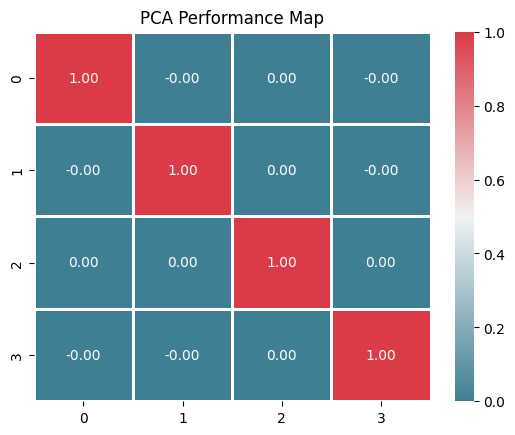

In [620]:
# Check PCA performance
ax = sns.heatmap(pca_data.corr(), cmap=colormap, annot=True, fmt=".2f", linewidth=2)
plt.title("PCA Performance Map")

> Next, plot the transformed version of the data and display principal component correlations relative to the _original variables._ <br/>

Text(0.5, 1.0, 'PCA Component vs. Variable Correlations')

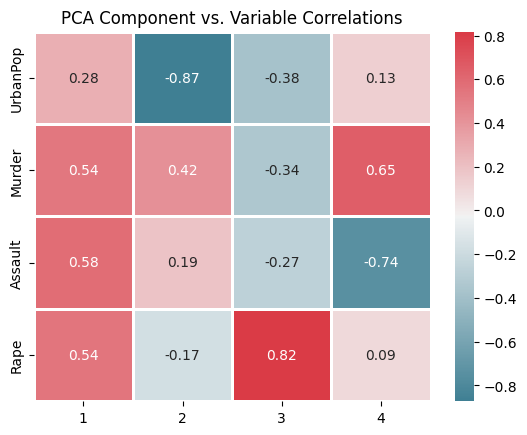

In [621]:
# Get principal components as dataframe
components = pd.DataFrame(pca.components_, columns=data.columns, index=range(1,len(data.columns)+1)).transpose()

# Create heatmap of components
ax = sns.heatmap(components,cmap=colormap, annot=True, fmt=".2f", linewidth=2)
plt.title("PCA Component vs. Variable Correlations")

In [636]:
# Get biplot function and adapt to current scenario (help credit: will_g on Dischord)

def biplot(pca_scores, coefficients, point_labels=None, data_points=None):
    x_coordinates = pca_scores[:, 0]
    y_coordinates = pca_scores[:, 1]
    n = coefficients.shape[0]
    x_scaling = 1.0 / (x_coordinates.max() - x_coordinates.min())
    y_scaling = 1.0 / (y_coordinates.max() - y_coordinates.min())

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.scatter(x_coordinates * x_scaling, y_coordinates * y_scaling, s=5)

    if data_points is not None:
        for i, point_label in enumerate(data_points):
            ax.annotate(
                point_label, (x_coordinates[i] * x_scaling, y_coordinates[i] * y_scaling), rotation=15
        )

    for i in range(n):
        ax.arrow(0, 0, coefficients[i, 0], coefficients[i, 1], color="r", alpha=0.5)
        if point_labels is None:
            ax.text(
                coefficients[i, 0] * 1.1,
                coefficients[i, 1] * 1.05,
                "Var" + str(i + 1),
                color="green",
                ha="center",
                va="center",
            )
        else:
            ax.text(
                coefficients[i, 0] * 1.1,
                coefficients[i, 1] * 1.05,
                point_labels[i],
                color="g",
                ha="center",
                va="center",
            )
    ax.set_xlim(None, 0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

Text(0.5, 1.0, 'Observations & Feature Importance')

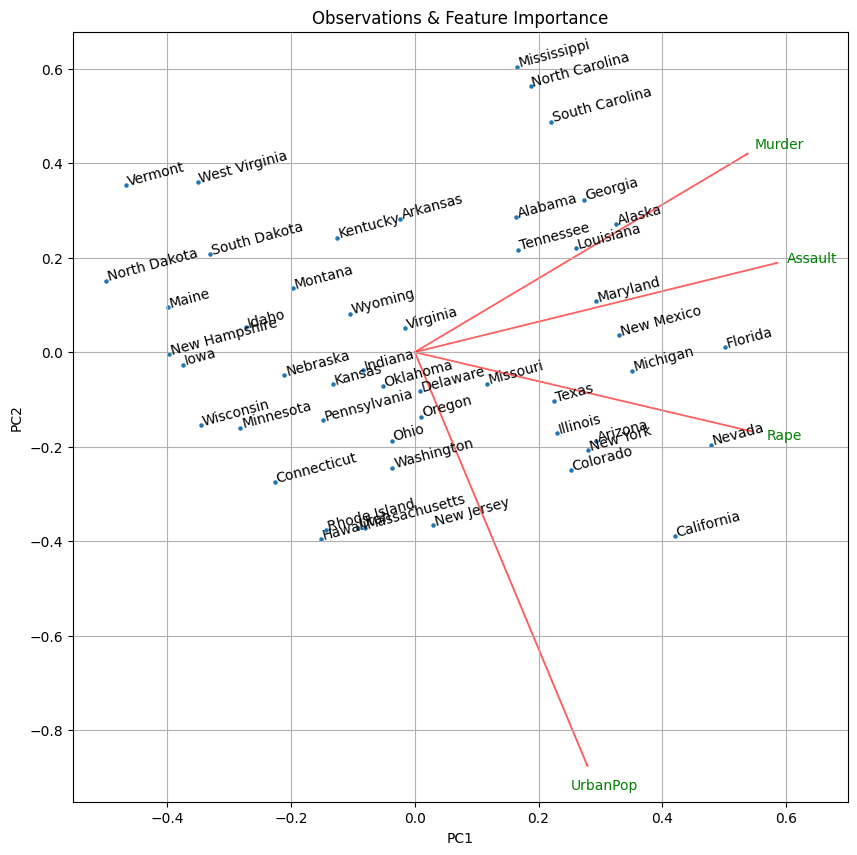

In [637]:
# Plot biplot showing projected observations and feature importance
biplot(p_comp,np.transpose(pca.components_),list(labels),list(states))
plt.title("Observations & Feature Importance")

> The biplot above shows standardised ahd transformed data points which correspond to projected observations. <br/> The red lines show the importance of each feature by magnitude of the vector. (Note that the feature vectors are not in highly distinct groups.) <br/> It apppears that the importance is similar, but that 'UrbanPop' is most important. This can be verified by displaying the importance metrics below. <br/>

In [574]:
# Feature importance
pc1 = abs( pca.components_[0] ) # PC1
pc2 = abs( pca.components_[1] ) # PC2
pc3 = abs( pca.components_[2] ) # PC3
pc4 = abs( pca.components_[3] ) # PC4

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df["PC3 Importance"] = pc3
feat_df["PC4 Importance"] = pc4
feat_df

,Features,PC1 Importance,PC2 Importance,PC3 Importance,PC4 Importance
0,UrbanPop,0.278,0.873,0.378,0.134
1,Murder,0.536,0.418,0.341,0.649
2,Assault,0.583,0.188,0.268,0.743
3,Rape,0.543,0.167,0.818,0.089


In [638]:
# Report the top importance features

pc1_list = list(pc1)
pc2_list = list(pc2)
pc3_list = list(pc3)
pc4_list = list(pc4)

total_list = pc1_list + pc2_list + pc3_list + pc4_list
labels_list = list(labels) + list(labels) + list(labels) + list(labels)

lx = len(pc1_list)
pc_list = ['PC1'] * lx + ['PC2'] * lx + ['PC3'] * lx + ['PC4'] * lx

top_importance = sorted(zip(total_list, labels_list, pc_list),reverse=True)[:len(list(labels))]

print("Top Importance Features:")
for n in top_importance:
    print(" ",n[2],":",n[1],f"-------(Top Score = {n[0]})")

Top Importance Features:
  PC2 : UrbanPop -------(Top Score = 0.8728061930604247)
  PC3 : Rape -------(Top Score = 0.8177779076261654)
  PC4 : Assault -------(Top Score = 0.7434074799367092)
  PC4 : Murder -------(Top Score = 0.6492278043419448)


> As we saw in the biplot, the above metrics confirm that 'UrbanPop' is most important feature (PC2) followed by 'Rape' (PC3), 'Assault' (PC4), and 'Murder' (PC4). <br/>

> In addition, it may be useful to plot the explained variance and the cumulative explained variance for each of the principal components below for additional observation and understanding. (We are visualising these values here, which we produced earlier in the PCA analysis).

Text(0.5, 1.0, 'Scree Plot')

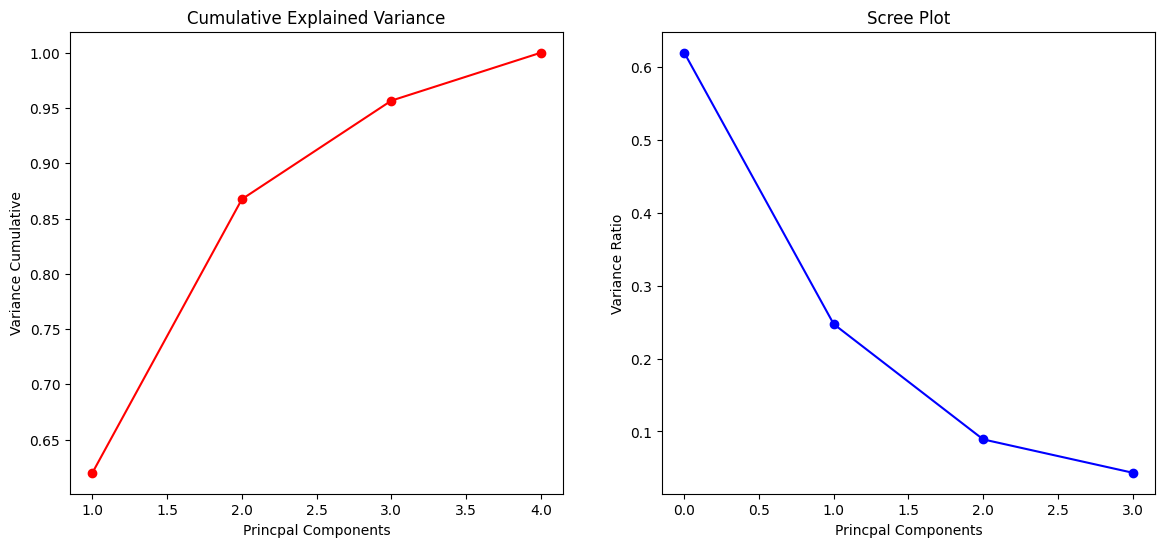

In [658]:
fig, ax = plt.subplots(1, 2,figsize=(14, 6))

# Cumulative variance plot
ax[0].set_ylabel('Variance Cumulative')
ax[0].set_xlabel('Princpal Components')
ax[0].plot(range(1,len(pca.explained_variance_ratio_ )+1),np.cumsum(pca.explained_variance_ratio_),'ro-')
ax[0].set_title("Cumulative Explained Variance")

# Scree plot
ax[1].plot(pca.explained_variance_ratio_, 'bo-')
ax[1].set_xlabel('Princpal Components')
ax[1].set_ylabel('Variance Ratio')
ax[1].set_title("Scree Plot")

### PCA Report: Conclusions

> According to the last graph above, the first 3 principal components explain about 95% of the variance. <br/>
> _However_, I will keep all 4 of them since there are no benefits to removing any. <br/>
> With all 4 variables in place, we explain 100% of the variance. There are essentially no true redundancies observed. <br/>
> In general, this dataset is not a _great_ candidate for PCA since there are only a few variables and none are very strongly correlated. <br/>
> Neither the biplot nor the importance scores suggest strong redundancies. Each variable is shown to carry a good portion of significance. <br/>
> The correlation heatmap between the principal components and the original variables also don't suggest strong redundancies. <br/>
> These observations all provide rationale for _not_ reducing any variables prior to clustering.

_____

### Clustering Report

____

### Cluster Method 1/2: Hierarchical Clustering

>An application of a first clustering technique out of two, including an analysis of the clusters generated.

In [577]:
# Create a fresh dataframe of the principal components to use for clustering methods
# All PCA components to be used in clustering
pca_df = pd.DataFrame(p_comp, index = states)
pca_df.head()

,0,1,2,3
City,,,,
Alabama,0.986,1.133,-0.444,0.156
Alaska,1.950,1.073,2.040,-0.439
Arizona,1.763,-0.746,0.055,-0.835
Arkansas,-0.141,1.120,0.115,-0.183
California,2.524,-1.543,0.599,-0.342


> Create an agglomerative (hierarchical) clustering model and fit the principal component data

In [578]:
# Generate heirarchical clustering model
model = AgglomerativeClustering()
model = model.fit_predict(pca_df)

> Plot dendrograms to illustrate some potential clusters

Text(0, 0.5, 'Cluster Distance')

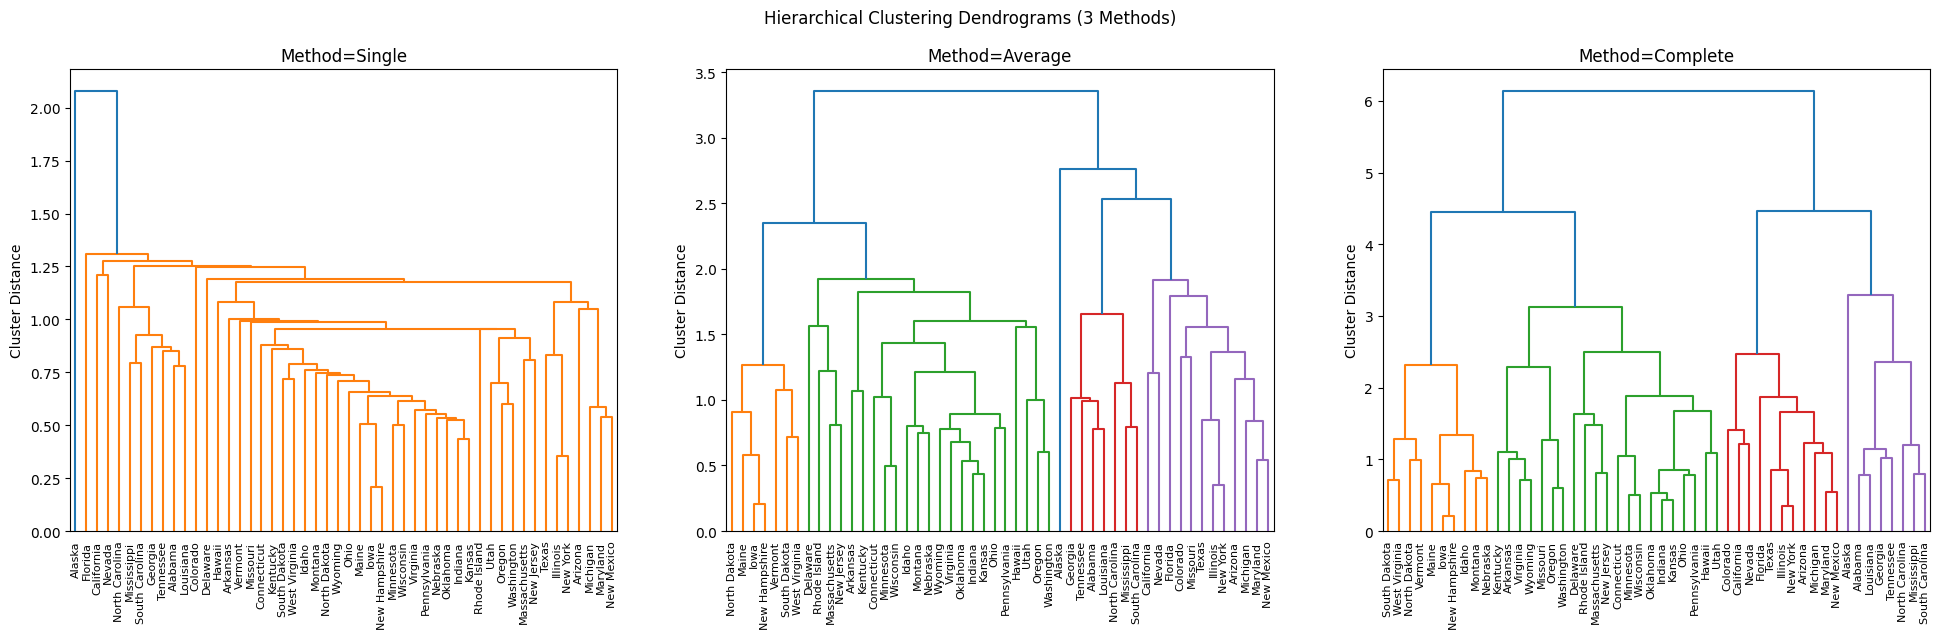

In [579]:
# Plot dendrograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

fig.suptitle('Hierarchical Clustering Dendrograms (3 Methods)')

ax1.set_title("Method=Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1)
ax1.set_ylabel("Cluster Distance")

ax2.set_title("Method=Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax2.set_ylabel("Cluster Distance")

ax3.set_title("Method=Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
ax3.set_ylabel("Cluster Distance")

> At first glance, there doesn't seem to be much of a pattern between the clusters proposed. The states are not geographically close, nor politically or economically similar. I suspect this dataset requires more variables to achieve better clusters / predictions.

>Choose a fixed number of clusters based on the dendrogram of choice: in this case, the complete method provides the clearest, most discrete clusters. (And the best subsequent silhouette score.)

In [580]:
# Number of clusters
k = 4

> Run agglomerative hierarchical clustering with the selected number of clusters and the linkage method used for that dendrogram.
> Generate predictions.

In [588]:
# Agglomerative hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')

# Make predictions
predict = cluster.fit_predict(pca_df)

> Obtain the silhouette score of the cluster results. The silhouette score is a metric used to calculate the fitness of a clustering technique. The score ranges from -1 to 1; a score of 1 means that clusters are well apart from each other and clearly distinguished. Zero means clusters are indifferent, i.e. the distance between clusters is not significant. Values near 0 would denote overlapping clusters. A value of -1 means that clusters are wrongly assigned.

In [599]:
# Calculate silhouette score
score = round(silhouette_score(p_comp, cluster.labels_),2)

# Display score
print("Hierarchical Silhouette Score:", score)

Hierarchical Silhouette Score: 0.32


> In this dataset, hierarchical clustering achieves a score in the range of 0.30-0.35. This suggests that the clusters are not very distinct but that there is _some_ significance. <br/>
> This observation of _some_ significance is consistent with the correlation observations during the PCA phase. <br/>
> To achieve better results, more variables are required in this dataset to add additional distinguishing features that would result in tighter clustering.

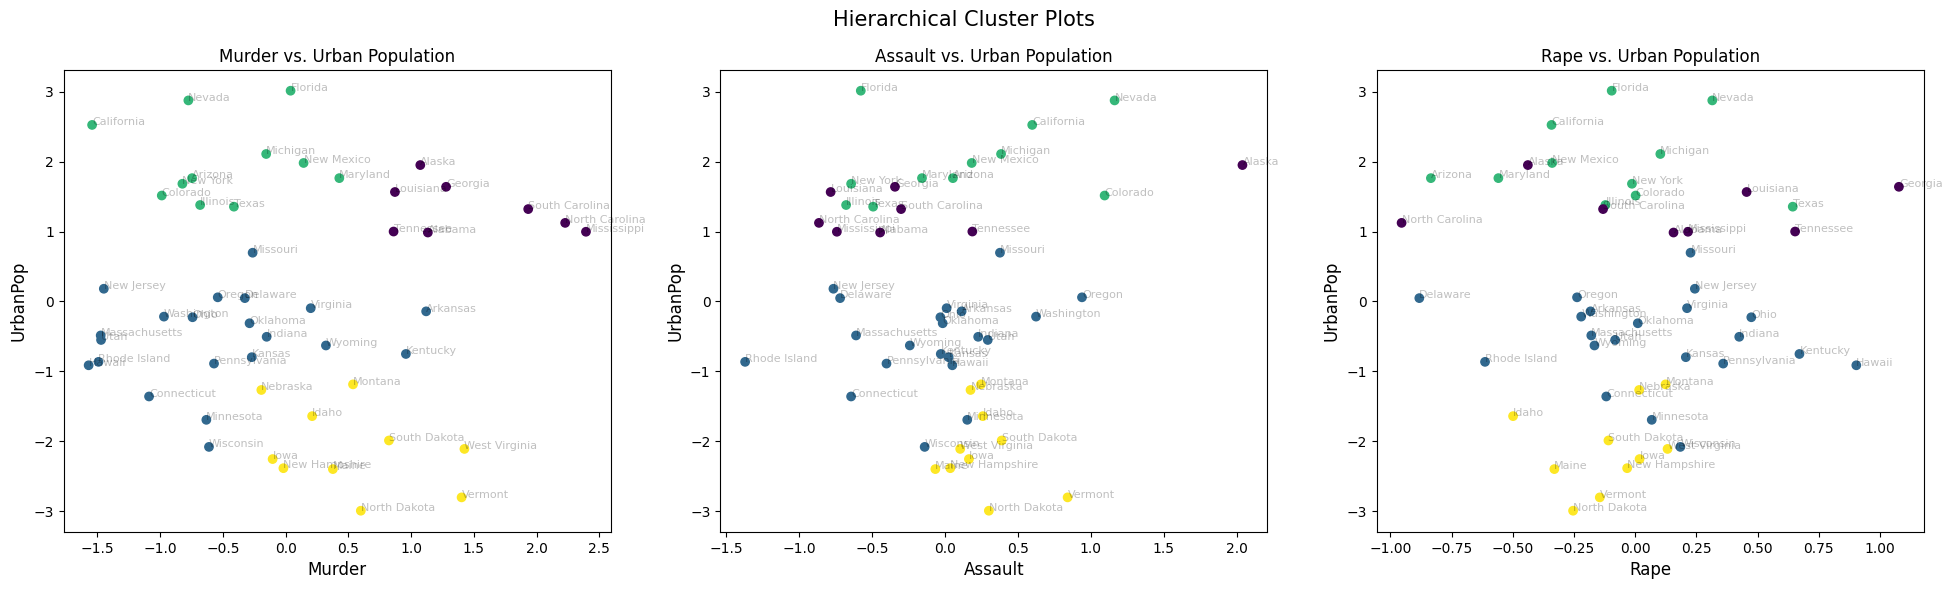

In [604]:
# Display hierarchical scatter plots

def hierarchical_figure():

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

        ax1.scatter(p_comp[:,1], p_comp[:,0], c=cluster.labels_)
        ax2.scatter(p_comp[:,2], p_comp[:,0], c=cluster.labels_)
        ax3.scatter(p_comp[:,3], p_comp[:,0], c=cluster.labels_)

        # Hierarchical annotations

        fig.suptitle('Hierarchical Cluster Plots', size=15,)

        ax1.set_title('Murder vs. Urban Population', size=12)
        ax1.set_xlabel(list(data.columns)[1], size=12)
        ax1.set_ylabel(list(data.columns)[0], size=12)

        ax2.set_title('Assault vs. Urban Population', size=12)
        ax2.set_xlabel(list(data.columns)[2], size=12)
        ax2.set_ylabel(list(data.columns)[0], size=12)

        ax3.set_title('Rape vs. Urban Population', size=12)
        ax3.set_xlabel(list(data.columns)[3], size=12)
        ax3.set_ylabel(list(data.columns)[0], size=12)

        for i in range(0,len(p_comp[:,0])):
                txt = states[i]
                ax1.annotate(txt, (p_comp[:,1][i], p_comp[:,0][i]),size=8,alpha=0.25)

        for i in range(0,len(p_comp[:,0])):
                txt = states[i]
                ax2.annotate(txt, (p_comp[:,2][i], p_comp[:,0][i]),size=8,alpha=0.25)

        for i in range(0,len(p_comp[:,0])):
                txt = states[i]
                ax3.annotate(txt, (p_comp[:,3][i], p_comp[:,0][i]),size=8,alpha=0.25)

hierarchical_figure()

_____

### Cluster Method 2/2: K-Means Clustering

>An application of a second clustering technique out of two, including an analysis of the clusters generated.

> For K-Means, a number of clusters must be selected from the onset. However, since we ran hierarchical clustering first, we can benefit from this by using the same value. In this case, the same number (4) will be selected so that the two clustering methods can be easily compared.

In [ ]:
# Number of clusters - same for both
k = k

> Run k-means clustering with the selected number of clusters.
> Generate predictions.

In [592]:
# K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')

# Make predictions
predict = kmeans.fit_predict(pca_df)

> Verify the clusters obtained using the silhouette score.

In [598]:
# Calculate silhouette score
score = round(silhouette_score(p_comp, kmeans.labels_),2)

# Display score
print("K-Means Silhouette Score:", score)

K-Means Silhouette Score: 0.34


> The k-means clustering achieves a score achieves a similar score to hierarchical clustering. <br/>
> This once again suggests that the clusters are not very distinct but that there is _some_ significance. <br/>
> Again - to achieve better results, more variables are required in this dataset to add additional distinguishing features that would result in tighter clustering.

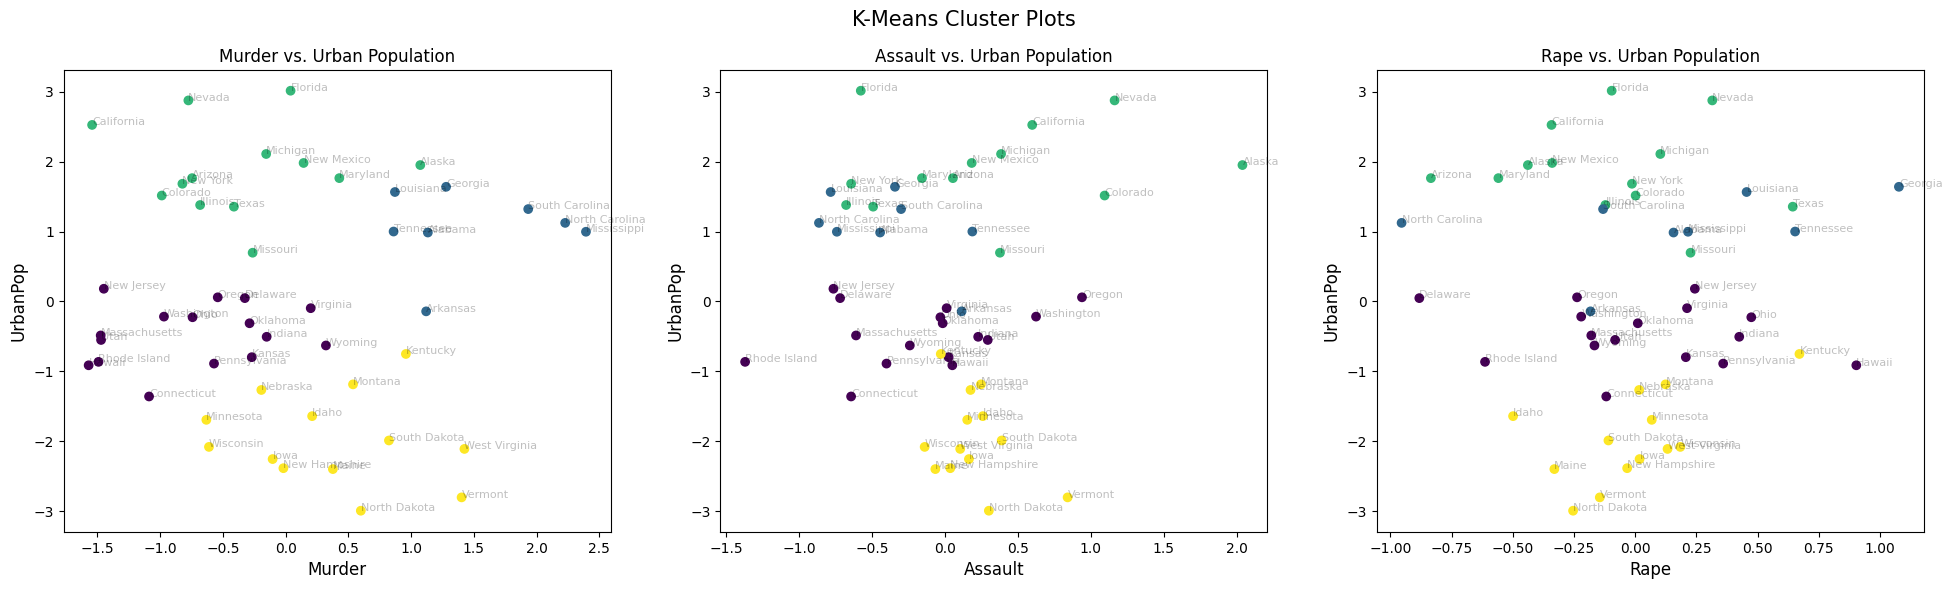

In [597]:
# Display k-means scatter plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

ax1.scatter(p_comp[:,1], p_comp[:,0], c=kmeans.labels_)
ax2.scatter(p_comp[:,2], p_comp[:,0], c=kmeans.labels_)
ax3.scatter(p_comp[:,3], p_comp[:,0], c=kmeans.labels_)

# K-means annotations

fig.suptitle('K-Means Cluster Plots', size=15,)

ax1.set_title('Murder vs. Urban Population', size=12)
ax1.set_xlabel(list(data.columns)[1], size=12)
ax1.set_ylabel(list(data.columns)[0], size=12)

ax2.set_title('Assault vs. Urban Population', size=12)
ax2.set_xlabel(list(data.columns)[2], size=12)
ax2.set_ylabel(list(data.columns)[0], size=12)

ax3.set_title('Rape vs. Urban Population', size=12)
ax3.set_xlabel(list(data.columns)[3], size=12)
ax3.set_ylabel(list(data.columns)[0], size=12)

for i in range(0,len(p_comp[:,0])):
        txt = states[i]
        ax1.annotate(txt, (p_comp[:,1][i], p_comp[:,0][i]),size=8,alpha=0.25)

for i in range(0,len(p_comp[:,0])):
        txt = states[i]
        ax2.annotate(txt, (p_comp[:,2][i], p_comp[:,0][i]),size=8,alpha=0.25)

for i in range(0,len(p_comp[:,0])):
        txt = states[i]
        ax3.annotate(txt, (p_comp[:,3][i], p_comp[:,0][i]),size=8,alpha=0.25)

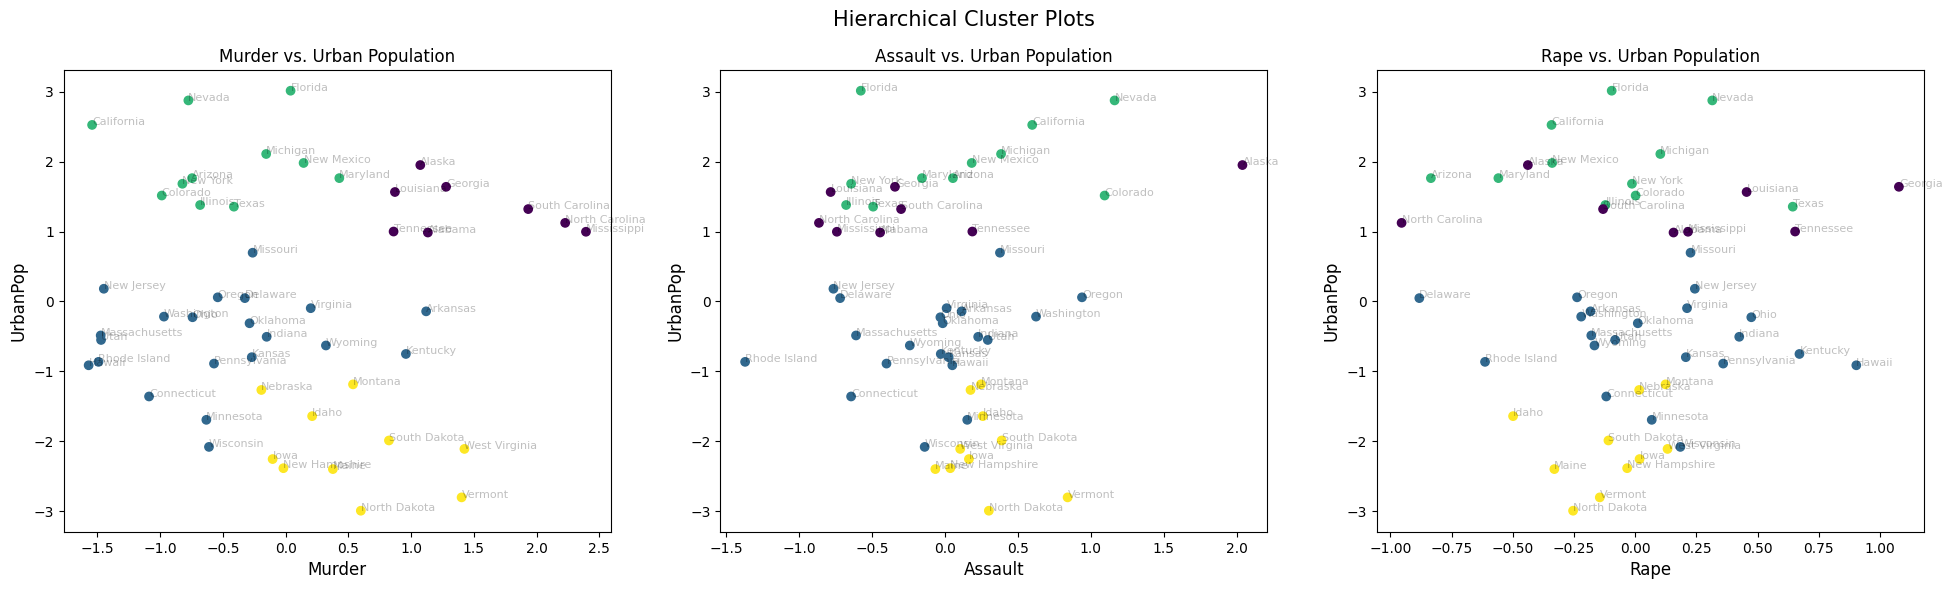

In [605]:
# Display hierarchical figure again for comparison
hierarchical_figure()

### Clustering Report: Conclusions


> It is worth comparing the two scatter plots illustrating the predicted clusters for the two methods. <br/>
> The graphs are very similar to each other with some contested individuals which shows that the data analysed, and not the clustering method, is the main issue in failing to achieve meaningful clusters. <br/>
> In general, this dataset is not a _great_ candidate for clustering since the individuals are too unique and do not form strong groupings when considering the variables. <br/>
> Both clustering algorithms achieved similar silhouette scores for fitness. Hierarchical clustering scored 0.32, while K-means scored 0.34 for the same number of clusters (value k). <br/>

Push all the work that you have generated for this project to GitHub.

> Pushed via VSCode. Link to repository: https://github.com/atkoleva/byb_project